## <center> Final Project - Stage 1 (EDA) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
df = pd.read_csv(r'C:\Users\Asus\Documents\E-Commerce Shipping Data.csv')

### 1. Descriptive Statistics

#### A. NULL Values and Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


#### B. Missing Values

In [5]:
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls','Customer_rating':'Rating','Cost_of_the_Product':'Cost','Prior_purchases':'Purchases','Product_importance':'Importance','Discount_offered':'Discount','Weight_in_gms':'Weight (gram)','Reached.on.Time_Y.N':'Late'})
df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

#### C. Statistical Summary

In [6]:
df_num = df[['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)']]
df_num.describe()

,Calls,Rating,Cost,Purchases,Discount,Weight (gram)
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [7]:
df_cat = df[['Warehouse','Shipment','Importance','Gender']]
df_cat.describe()

,Warehouse,Shipment,Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [8]:
df['Late'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Late, dtype: float64

In [9]:
numericals = ['Cost', 'Discount', 'Weight (gram)']
category = ['Warehouse', 'Shipment', 'Calls', 'Rating', 'Purchases','Importance', 'Gender']

In [10]:
# Menghitung Variance
round(df[numericals].var(), 2)

Cost                2310.08
Discount             262.62
Weight (gram)    2674458.75
dtype: float64

In [11]:
# Menghitung Standard Deviation
round(df[numericals].std(), 2)

Cost               48.06
Discount           16.21
Weight (gram)    1635.38
dtype: float64

#### D. Hasil Observasi  <br>

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
    Semua tipe data sudah sesuai <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
    Tidak ada kolom yang memiliki missing value <br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
    Jika dilihat dari nilai max, variabel Purchases dan Discount kemungkinan memiliki nilai outlier

### 2. Univariate Analysis

#### A. Numericals

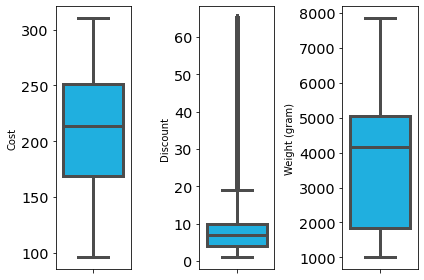

In [12]:
plt.figure(figsize=(6,4))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

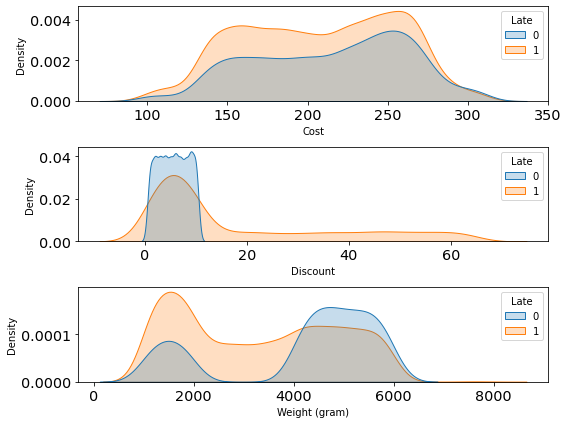

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, len(numericals)):
    plt.subplot(3,1, i+1)
    sns.kdeplot(data=df, x=df[numericals[i]], hue='Late', fill='True')
    plt.tight_layout()

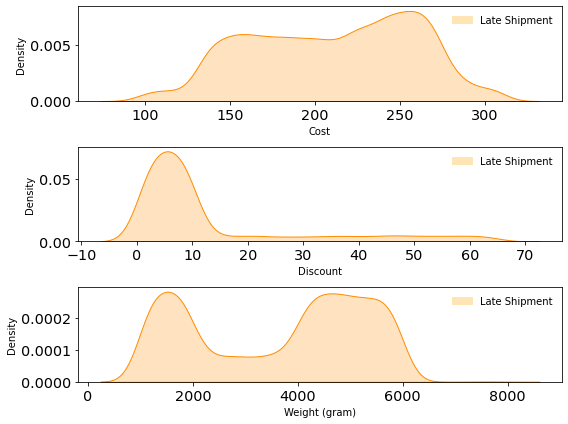

In [14]:
Latefix = df[df['Late']>0]
plt.figure(figsize=(8,6))
for i in range(0, len(numericals)):
    plt.subplot(3,1, i+1)
    sns.kdeplot(data=Latefix, x=df[numericals[i]], color='darkorange', fill='True')
    Orange_patch = mpatches.Patch(color='moccasin', label='Late Shipment')
    plt.legend(handles=[Orange_patch], frameon=False, loc=1)
    plt.tight_layout()

In [15]:
# Menghitung nilai skew
df[numericals].skew(axis=0, skipna=True)

Cost            -0.157117
Discount         1.798929
Weight (gram)   -0.249747
dtype: float64

#### B. Category

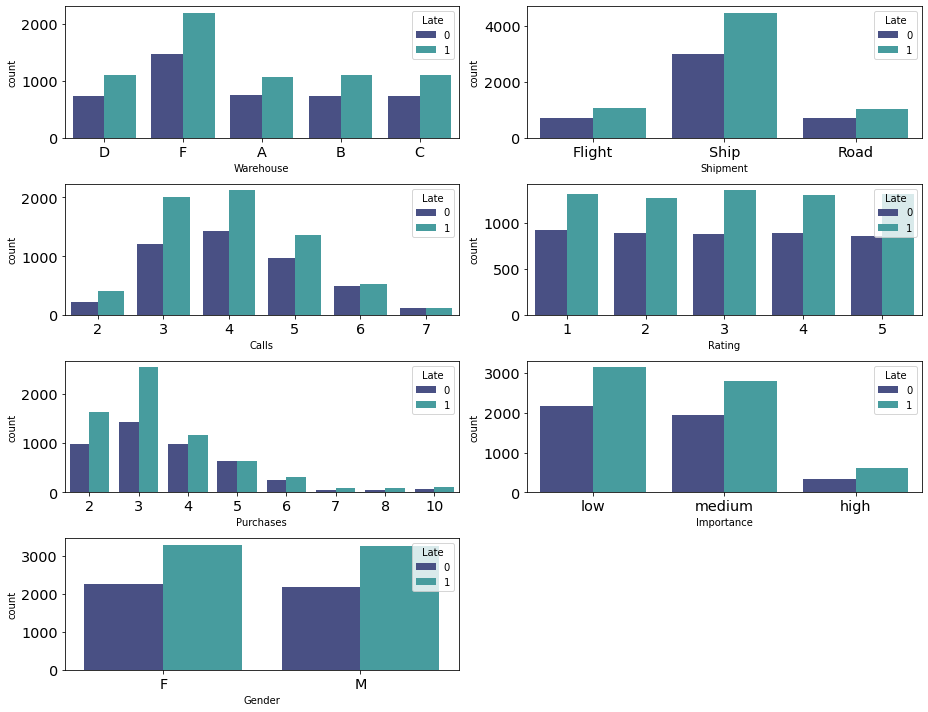

In [16]:
plt.figure(figsize=(13,10))
for i in range(0, len(category)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[category[i]], orient='v', hue=df['Late'], palette='mako')
    plt.tight_layout()

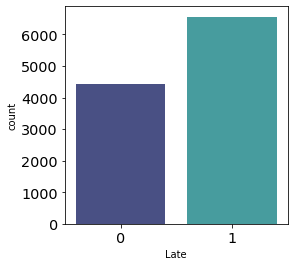

In [17]:
plt.figure(figsize=(4, 4))
sns.countplot(x=df['Late'], data=df, palette='mako')
plt.show()

#### C. Hasil Observasi  <br>
- Variabel Purchases dan Discount memiliki outlier dan membentuk pola positively Skewed
- Variabel Cost memiliki distribusi yang paling mendekati distribusi normal
- Warehouse block yang paling banyak digunakan adalah Warehouse F
- Shipment mode yang dominan adalah pengiriman dengan kapal
- Jumlah sampel yang mengalami keterlambatan pengiriman lebih banyak <br>

Apa yang harus di-follow up saat data pre-processing? <br>
- Remove outlier
- Melakukan OHE pada feature Warehouse dan Shipment
- Melakukan label encoding pada feature Gender dan Product Importance
- Melakukan standardisasi pada feature Cost dan Weight
- Melakukan log transformation pada feature Discount dan Purchases

### 3. Multivariate Analysis

#### A. Heatmap Plot

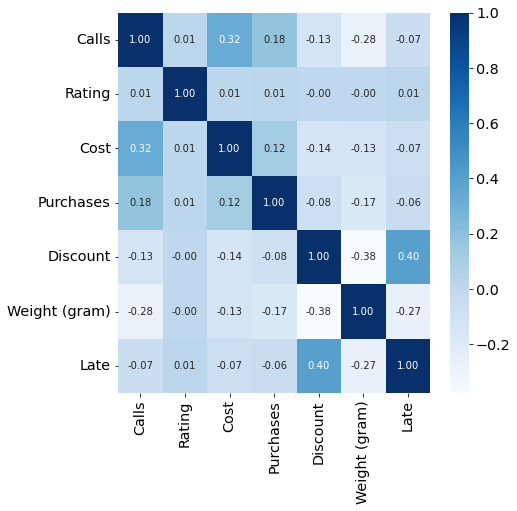

In [18]:
df_corr = df.drop(['ID'], axis=1)
plt.figure(figsize=(7, 7))
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

#### B. Scatter Plot

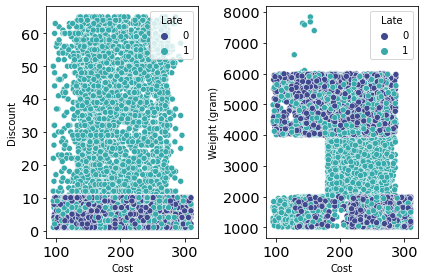

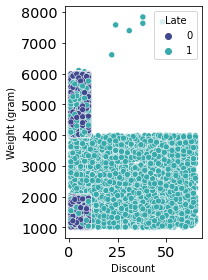

In [19]:
s1 = ['Discount','Weight (gram)']

fig = plt.figure(figsize=(6, 4))
for i in range(0, len(s1)): 
    ax = fig.add_subplot(1, 2, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Cost', y=s1[i], hue='Late', palette='mako')
    plt.tight_layout() 
    
fig = plt.figure(figsize=(3, 4))
sns.scatterplot(data=df, x='Discount', y='Weight (gram)', hue='Late', palette='mako')
plt.tight_layout() 

#### C. Category Plot

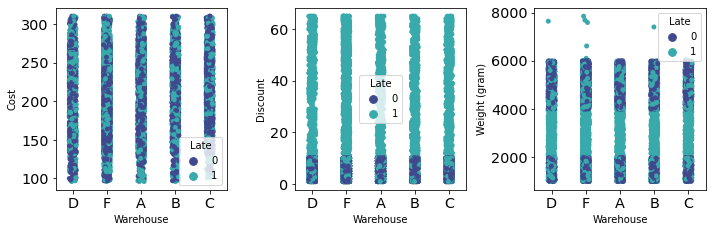

In [20]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Warehouse', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

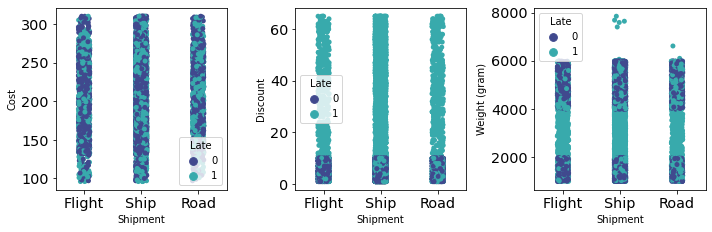

In [21]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Shipment', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

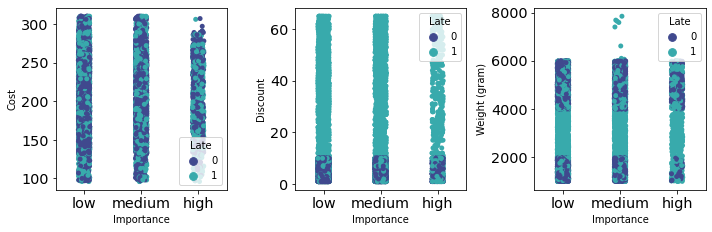

In [22]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Importance', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

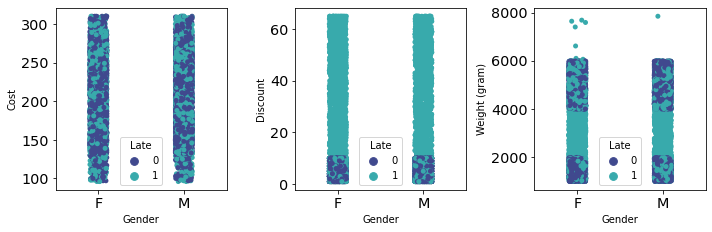

In [23]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

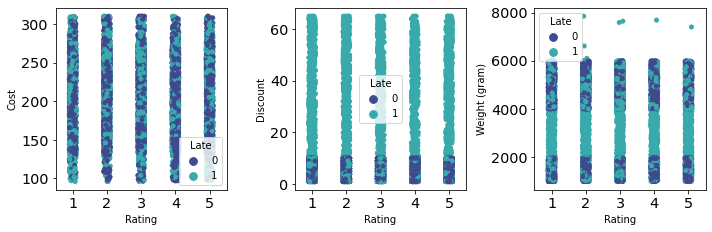

In [24]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Rating', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

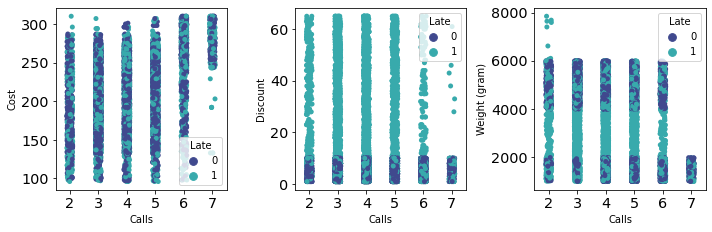

In [25]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Calls', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

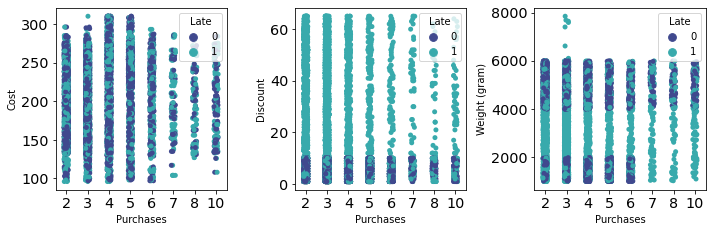

In [26]:
fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Purchases', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

#### D. Hasil Observasi  <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan? <br>
Discount dan Weight <br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu 
dilakukan terhadap feature itu? <br>
Weight terhadap Calls <br>
Weight terhadap Discount <br>
Cost terhadap Calls

### 4. Business Insight

#### A. Late Shipment Based On Discount

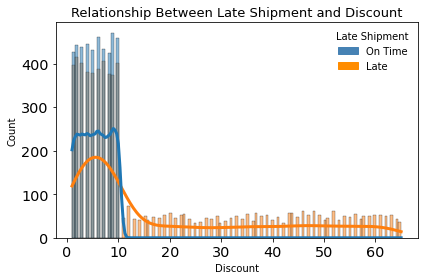

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Discount', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Discount', fontsize=13)
plt.tight_layout()

Untuk pembelian produk dengan discount diatas 10% banyak mengalami keterlambatan pengiriman. <br>
Dalam hal ini pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer ketika melakukan pembelian dengan menggunakan discount yang besar yang memungkinkan produk yang dipesan tidak terkirim tepat waktu.

#### B. Late Shipment Based on Product Weight

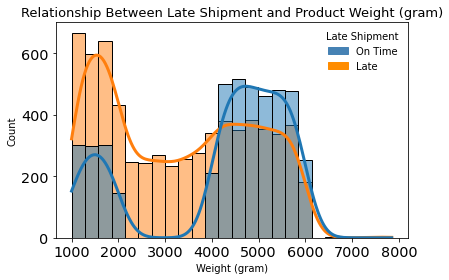

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Weight (gram)', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Product Weight (gram)', fontsize=13)
plt.tight_layout()

Barang dengan berat 2-4 Kg mengalami keterlambatan pengiriman. <br>
Dalam hal ini, pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer yang membeli produk di rentang berat produk 2-4 kg sebelum customer melakukan transaksi.

#### C. Late Shipment Based on Customer Care Calls

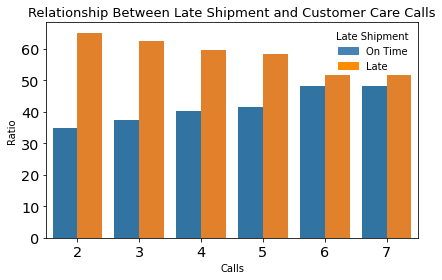

In [29]:
df_Calls1 = df.groupby(['Calls', 'Late']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah x'})
df_Calls2 = df.groupby(['Calls']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah y'})
df_Calls= df_Calls1.merge(df_Calls2,
                              left_on = ['Calls'],
                              right_on = ['Calls'],
                              how = 'inner')
df_Calls['Ratio'] = np.round(df_Calls['Jumlah x']*100 / df_Calls['Jumlah y'], 2)


plt.figure(figsize=(6,4))
sns.barplot(x='Calls', y ='Ratio', data = df_Calls, hue='Late')
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Customer Care Calls', fontsize=13)
plt.tight_layout()

Berdasarkan data jumlah keterlambatan pengiriman menurun dengan meningkatnya jumlah telepon yang diterima oleh customer care.
Perusahaan perlu mencari informasi mengenai isi telepon customer kepada customer care (siapa penelpon, isi telepon), sehingga bisa menentukan korelasi dengan jumlah keterlambatan pengiriman.

Rekomendasi dengan Asumsi: 
1. Bila di asumsikan bahwa pelanggan menelpon untuk melakukan konfirmasi pemesanan, maka bisa dilakukan proses konfirmasi pemesanan dari pelanggan memberikan pengingat kepada penjual untuk segera melakukan konfirmasi ketersediaan barang dan kesiapaan pengiriman kepada bagian pengiriman atau kurir. (bisa dengan aplikasi atau ditambahkan pada petugas tertentu).
2. Bila di asumsikan bahwa penjual menelpon untuk melakukan konfirmasi kesediaan pesanan dan barang siap di kirim, maka bisa dilakukan proses otomatisasi saat penjual konfirmasi kesediaan barang, langsung barang disiapkan untuk di kirim pada hari yang sama dan mengirimkan konfirmasi untuk kurir mengirimkan.